In [1]:
import cv2
import h5py
from func_rgb import *
from skimage.measure import compare_ssim

/home/wazir/.virtualenvs/wazir/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
scale=3
r_field=41
src=loadimg("Set5/butterfly_GT.bmp")
src_LR=create_LR(src,scale)
sub_gt=subimg(src,r_field)
lr=subimg(src_LR,r_field)


model=vdsr_model_add(r_field)
model.summary()
model.load_weights("vdsr_colab_rgb.h5")
pred=model.predict(lr)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 41, 41, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 41, 41, 64)   1792        input[0][0]                      
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 41, 41, 64)   36928       conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 41, 41, 64)   36928       conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_4 (

In [3]:
H,W,_=src[0].shape
_sub_gt=reconstruction(sub_gt,H,W,r_field)
_lr=reconstruction(lr,H,W,r_field)
_pred=reconstruction(pred,H,W,r_field)

In [4]:
p1=psnr(_sub_gt,_lr)
p2=psnr(_sub_gt,_pred)
s1=compare_ssim(_sub_gt,_lr,multichannel=True)
s2=compare_ssim(_sub_gt,_pred,multichannel=True)
cv2.imshow("GT",_sub_gt)
cv2.imshow("LR",_lr)
cv2.imshow("predict",_pred)
print("lr:",p1)
print("lr:",s1)
print("predict:",p2)
print("predict:",s2)
cv2.waitKey(0)

lr: 22.162
lr: 0.8520680281733256
predict: 22.617
predict: 0.8862477088004335


-1

In [5]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 245.5, 245.5, -0.5)

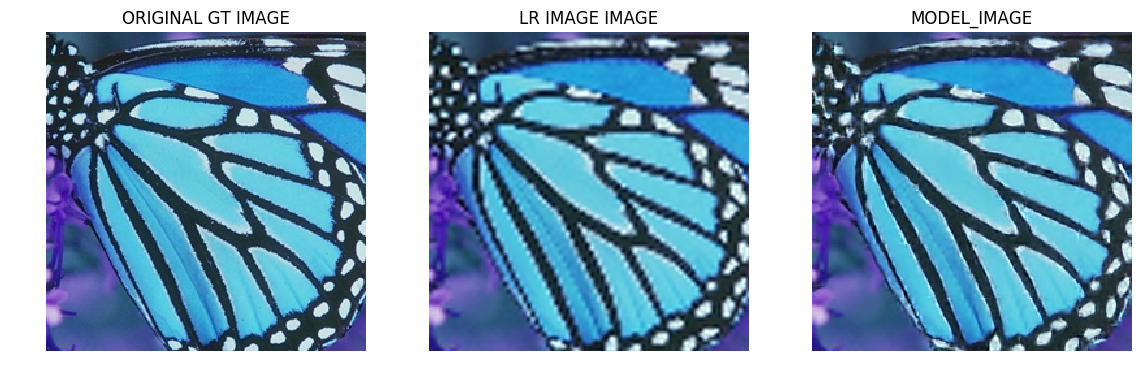

In [6]:
fig = plt.figure(figsize =(14,14),dpi=100)
ax = plt.subplot("131")
ax.imshow(_sub_gt)
ax.set_title('ORIGINAL GT IMAGE')
plt.axis('off')

ax = plt.subplot("132")
ax.imshow(_lr)
ax.set_title('LR IMAGE IMAGE')
plt.axis('off')

ax = plt.subplot("133")
ax.imshow(_pred)
ax.set_title('MODEL_IMAGE')
plt.axis('off')